# Метод ближайжих соседей для задач классификации KNN. 

Может использоваться для задач регрессии только в случае, если целевая переменная непрерывная. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\mmd28\OneDrive\Рабочий стол\Scripts\ML_engeneer\Classification\Data\gene_expression.csv")

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
len(df)

3000

<Axes: xlabel='Gene One', ylabel='Gene Two'>

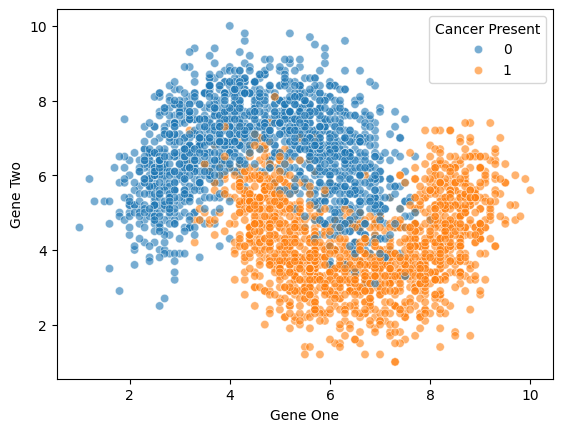

In [5]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.6)

Увеличим график в точке смешения данных. параметр alpha сделает точки полупрозрачными и параметр style выделит крестиком точки и мы их увидим в мете наложения.

(4.0, 7.5)

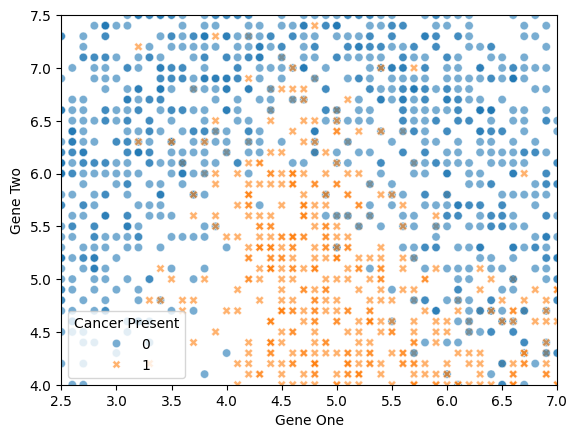

In [6]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', 
                alpha=0.6, style='Cancer Present')
plt.xlim(2.5, 7)
plt.ylim(4, 7.5)

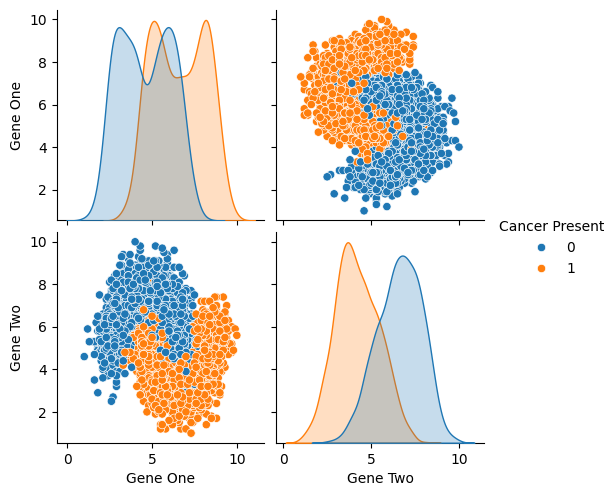

In [7]:
sns.pairplot(data=df, hue='Cancer Present')

У значений Gene One две вершины, а значит этот показатель имеет два значения. В любом случае, мы видим, что эти два класса могут быть разделимы.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Разделим датасет на признаки и целевую переменную

In [9]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Масштабируем (выполним стандартизацию) признаки. **Для метода KNN масштабирование обязательно!**

In [11]:
scaler = StandardScaler()

In [12]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Мы сделали значение к=1 - один сосед. Обучили модель и сейчас проверим ее на тестовом наборе данных.

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
y_pred = knn_model.predict(scaled_X_test)

In [18]:
confusion_matrix(y_test, y_pred)

array([[426,  44],
       [ 45, 385]])

In [19]:
len(y_test)

900

С параметром к=1 мы видим неправильно классифицированны 99 точек из 900 (44 + 45). 

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



precision и recall имеют хорошие значения в обоих случаях. Посмотри распределение значений в целевой переменной.

In [21]:
df['Cancer Present'].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

Мы видим равное распределение между двумя классами. Датасет сбаллансирован. 

**Подберем значение К для нашей модели.**

**Метод локтя**. Переберем циклом значение К и каждый раз вычислять ошибки методом 1 - accuracy.

In [22]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test, y_pred)

0.9011111111111111

In [26]:
# создадим список для хранения ошибок
test_error_rates = []

# напишем цикл
for k in range(1, 30):
    # поместим переменную к в модель для подбора циклом
    knn_model = KNeighborsClassifier(n_neighbors=k)
    # обучим модель с указанным значением к (от 1 до 30 по циклу)
    knn_model.fit(scaled_X_train, y_train)

    # сделаем предсказание для тестового набора данных
    y_pred_test = knn_model.predict(scaled_X_test)

    # вычислим метрику accuracy
    test_error = 1 - accuracy_score(y_test, y_pred_test)

    # внесем результат в наш список
    test_error_rates.append(test_error)

В итоге мы получили список со значениями метрик для различных значений к. Посмотрим на них.

In [27]:
test_error_rates

[0.09888888888888892,
 0.09777777777777774,
 0.07333333333333336,
 0.0755555555555556,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.061111111111111116,
 0.05777777777777782,
 0.06222222222222218,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.05888888888888888,
 0.05777777777777782,
 0.05666666666666664,
 0.05555555555555558,
 0.05222222222222217,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.05777777777777782,
 0.05666666666666664]

Text(0.5, 0, 'К ближайших соседей')

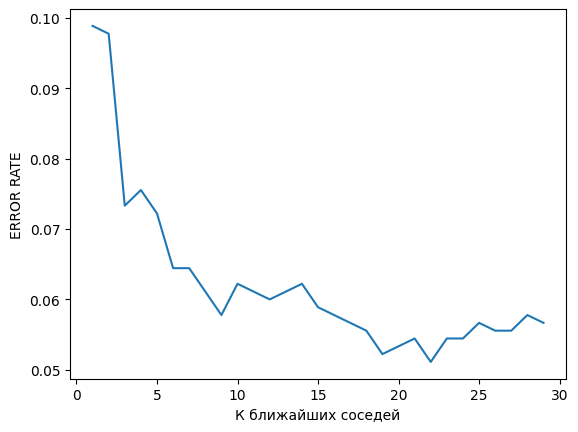

In [28]:
plt.plot(range(1, 30), test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('К ближайших соседей')

Не ясно в чем отличие значения Х=6 и Х=22. Обе точки находятся в диапазоне от 0,05 до 0,06. Внесем уточнения в график.

(0.0, 0.11)

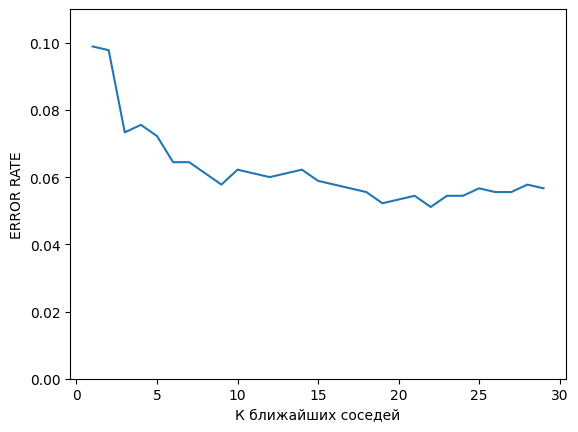

In [29]:
plt.plot(range(1, 30), test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('К ближайших соседей')
plt.ylim(0, 0.11)

разница между к=6 и к=22 соответствует примерно 1%. Что бы упростить модель мы выберем к=6. 

**Применим кросс-валидацию методом Pipeline**

In [30]:
scaler = StandardScaler()

In [31]:
knn = KNeighborsClassifier()

In [ ]:
# посмотри все параметры метода
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

**Создаем простой pipeline**

Создадим список наших операций, где каждая опеерация - это контеж:
1. Масштабирование методом scaler
2. Создание модели и обучение модели

In [33]:
operations = [('scaler', scaler), ('knn', knn)]

Создаим сам pipeline

In [34]:
from sklearn.pipeline import Pipeline

In [37]:
pipe = Pipeline(operations)

Создадим поиск по сетке GreedSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
# определим значения к
k_values = list(range(1, 20))

Для каждого значения к в этом методе (Pipeline + GreedSearchCV) мы сразу подберем значение к и проведем кросс-валидацию.

In [38]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

Мы помещаем сетку кросс-валидации внутрь Pipeline и пишем названия параметров следуюшим образом. 

- выбранное название строки + два нижних подчеркивания;
- название модели +__+ название параметра;
- knn_model +__+ n_neighbors
- knn_model__n_neighbors

Мы это делаем, что бы Sklearn значл, к какой операции в pipeline относятся эти парметры (чтобы не принял нашу модель n_neighbors за параметр для scaler)

In [41]:
param_grid = {'knn__n_neighbors': k_values}

In [42]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')  # количество разбиений для кросс-валидации = 5

In [43]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

Узнаем наилучшие параметры

In [45]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

Тут мы видим, что для нашей модели лучший параметр к = 16 (knn__n_neighbors': 16)

Проверим наши параметры на тестовых данных (final tets set)

In [47]:
full_pred = full_cv_classifier.predict(X_test)

In [48]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



При помощи пфплайн и кросс-валидации мы вычислили, что значение к = 16 в среднем минимизирует ошибку. 

Проверим модель на новых данных. Предположим, что ген 1 = 3,8, а ген 2 = 6,4

In [49]:
new_patient = [[3.8, 6.4]]

На сколько вероятно, что нового пациенты может быть рак?

In [50]:
full_cv_classifier.predict(new_patient)

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

Модель предсказала отсутсиве рака у нового пациента

In [51]:
full_cv_classifier.predict_proba(new_patient)

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1., 0.]])

Мы получили 100% вероятность предсказания. Все 16 ближайших соседей относились к классу 0 (нет рака). 